In [1]:

import radiative_transfer_bnn as rt

import torch

import numpy as np

import matplotlib.pyplot as plt

import plotter as pltr

import pandas as pd

In [2]:
# def get_nfr(**kwargs):
#     # Define default values
#     n = kwargs.get('n', None)
#     f = kwargs.get('f', None)
#     r = kwargs.get('r', None)


#     # Create a dictionary to map argument names to indices
#     arg_indices = {'n': 0, 'f': 1, 'r': 2}

    

#     wavelength = []
#     mean_pred_results = torch.empty(200,3,113)
#     std_pred_results = torch.empty(200,3,113)
#     x_test = torch.empty(200,3,113)
#     y_test = torch.empty(200,3,113)


#     for key, value in kwargs.items():
        
#         model = rt.RadiativeTransferBNN(1000, 0.3, 0.01, value)
#         model.preprocess_data()
#         model.train_model(250, 200)
#         wavelength = model.wavelength
#         mean_pred_results[:,arg_indices[value],:], std_pred_results[:,arg_indices[value],:] = model.test_model()
#         x_test[:,arg_indices[value],:] = model.X_test
#         y_test[:,arg_indices[value],:] = model.y_test

#     return wavelength, mean_pred_results, std_pred_results, x_test, y_test


            

    




In [3]:
# wavelength, mean_pred_results, std_pred_results, x_test, y_test = get_nfr(arg1 = 'n', arg2 = 'f', arg3 = 'r')

In [4]:
model = rt.RadiativeTransferBNN(1000, 0.3, 0.01, 'flux')
model.preprocess_data()
model.train_model(250, 200)
wavelength = model.wavelength
mean_pred_results, std_pred_results = model.test_model()
x_test = model.X_test
y_test = model.y_test

c:\Users\joshu\OneDrive\Desktop\Physics_Year_3\Final_year_project\Github\project_script\src\semester2\week3\radiative_transfer_bnn.py:285: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.df = pd.concat([


Training the model...
- epoch 1/250 - cost: 9.136, kl:                 0.053
- epoch 2/250 - cost: 5.882, kl:                 0.092
- epoch 3/250 - cost: 5.201, kl:                 0.127
- epoch 4/250 - cost: 2.907, kl:                 0.157
- epoch 5/250 - cost: 1.816, kl:                 0.181
- epoch 6/250 - cost: 1.319, kl:                 0.200
- epoch 7/250 - cost: 1.120, kl:                 0.213
- epoch 8/250 - cost: 0.643, kl:                 0.222
- epoch 9/250 - cost: 0.461, kl:                 0.229
- epoch 10/250 - cost: 0.388, kl:                 0.234
- epoch 11/250 - cost: 0.343, kl:                 0.237
- epoch 12/250 - cost: 0.333, kl:                 0.239
- epoch 13/250 - cost: 0.243, kl:                 0.240
- epoch 14/250 - cost: 0.247, kl:                 0.241
- epoch 15/250 - cost: 0.209, kl:                 0.241
- epoch 16/250 - cost: 0.195, kl:                 0.242
- epoch 17/250 - cost: 0.348, kl:                 0.242
- epoch 18/250 - cost: 0.184, kl:  

In [5]:
print(x_test.shape)

torch.Size([230, 3])


In [6]:
star_mass = torch.linspace(10.5, 10.5, 20)
dust_mass = torch.linspace(7, 7, 20)
theta = torch.linspace(-180, 180, 20)
x_pred = model.create_predict_tensor(star_mass, dust_mass, theta)
print(x_pred.shape)
mean_pred_results, std_pred_results = model.predict(x_pred)

torch.Size([20, 3])
Predicting the output...


(500, 20, 113)


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

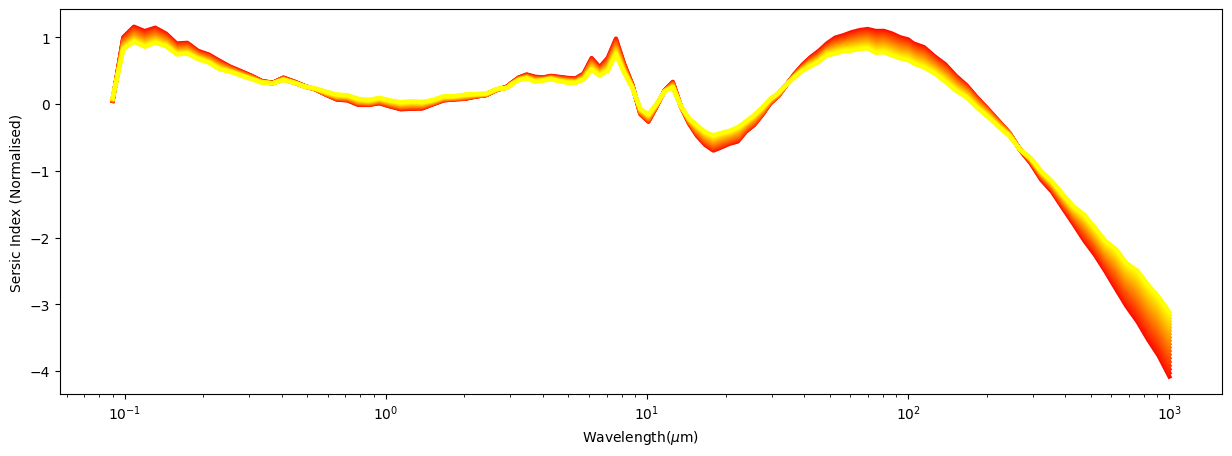

In [7]:
plotter = pltr.Plotter(wavelength, mean_pred_results, x_test, y_test,"f")
plotter.plot_same_ax(0,20,1)

#it's not changing enough for angle
# you can only notice a change by going outside the range of values
#is this to do with normalisation when training the model?
# most likely
#is it worth seeing how SKIRT changes with angle?
#maybe create a function that groups SKIRT data over a range, no we need to generate more for fixed values
#see if the sub-runs are any different, for, like, 3-4 runs; if no conclusive difference, then yeah

In [ ]:
# np.savez('data_file.npz', wavelength=wavelength, mean_pred_results=mean_pred_results,
#         std_pred_results=std_pred_results, x_test=x_test, y_test=y_test)

In [ ]:
loaded_data = np.load('data_file.npz')
wavelength = loaded_data['wavelength']
mean_pred_results = loaded_data['mean_pred_results']
std_pred_results = loaded_data['std_pred_results']
x_test = loaded_data['x_test']
y_test = loaded_data['y_test']

In [ ]:
print(x_test.shape)

(230, 3)


IndexError: index 100 is out of bounds for axis 0 with size 20

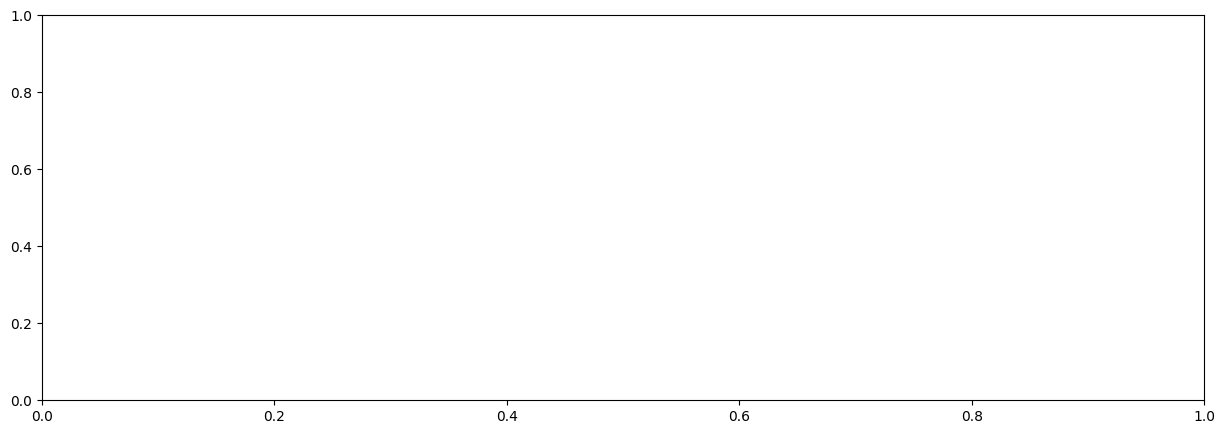

In [ ]:
plotter = pltr.Plotter(wavelength, mean_pred_results, x_test, y_test,"f")
#plotter.plot_line(x=wavelength, y=mean_pred_results[0, :])
#plotter.plot_single(150, "grey", "salmon")
#plotter.plot_group_same(100, 120, "grey", "salmon")
plotter.plot_same_ax(100,200,1)

#plotter.save_figure("test.png")


In [ ]:
#write prdeict function on saved model
#linear interpolation of extremes
#can only predict within the range of the training data
#what about extrapolation?
#comapare for extraploation can use predict function
#what is the uncertainty of the prediction
#Produce SED 

In [ ]:
#plotter function add std deviation
#change labels
#cost_vs_epochs plot
#ask steven about datd
#generate data for fixed values

